<a href="https://colab.research.google.com/github/Edenshmuel/ICU_Nutrition_ML/blob/main/Patient_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Loading Preprocessing Pipeline from GitHub**

In [1]:
import requests
import nbformat
from nbconvert import PythonExporter

url = "https://raw.githubusercontent.com/Edenshmuel/ICU_Nutrition_ML/refs/heads/main/Pipeline.ipynb"

response = requests.get(url)

if response.status_code == 200:
    notebook_content = response.text
    notebook = nbformat.reads(notebook_content, as_version=4)
    python_exporter = PythonExporter()
    source, _ = python_exporter.from_notebook_node(notebook)
    exec(source)

    print("✅ Pipeline loaded successfully from GitHub!")
else:
    print(f"❌ Failed to fetch notebook: {response.status_code}")

✅ Pipeline loaded successfully from GitHub!


**Importing the Data**

Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

Cloning the Project Repository

In [3]:
!git clone https://github.com/Edenshmuel/ICU_Nutrition_ML.git

fatal: destination path 'ICU_Nutrition_ML' already exists and is not an empty directory.


Loading the Dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Edenshmuel/ICU_Nutrition_ML/refs/heads/main/Food_and_Nutrition__.csv")
df.head()

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.0,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.0,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.0,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.0,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.0,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain


**Data Preprocessing**

Categorize Features

In [5]:
numerical_features = ["Ages", "Height", "Weight", "Carbohydrates"]
categorical_features = ["Activity Level"]
Multy_categorical_features = ["Disease"]
right_skewed_features = ["Protein", "Calories", "Fat"]

**Apply the Pipeline**

In [6]:
preprocessor = create_preprocessor(numerical_features, categorical_features, Multy_categorical_features, right_skewed_features)
df_transformed = preprocessor.fit_transform(df)

In [7]:
df_transformed = pd.DataFrame(df_transformed)
df_transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.464201,0.481166,0.436808,0.114754,0.60,0.450704,0.411392,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.248564,0.271265,0.180422,0.229508,0.30,0.239437,0.253165,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.367128,0.534156,0.487647,0.491803,0.50,0.661972,0.569620,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.546390,0.671975,0.619805,0.606557,0.20,0.309859,0.727848,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.248564,0.408950,0.381619,0.721311,0.40,0.521127,0.411392,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,0.334223,0.161614,0.211157,0.573770,0.64,0.394366,0.018987,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1694,0.610942,0.508020,0.534772,0.327869,0.00,0.394366,0.284810,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1695,0.712271,0.638150,0.658459,0.639344,0.30,0.352113,0.427215,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1696,0.854097,0.815297,0.823133,0.360656,0.32,0.605634,0.670886,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Exploratory Data Analysis - EDA**

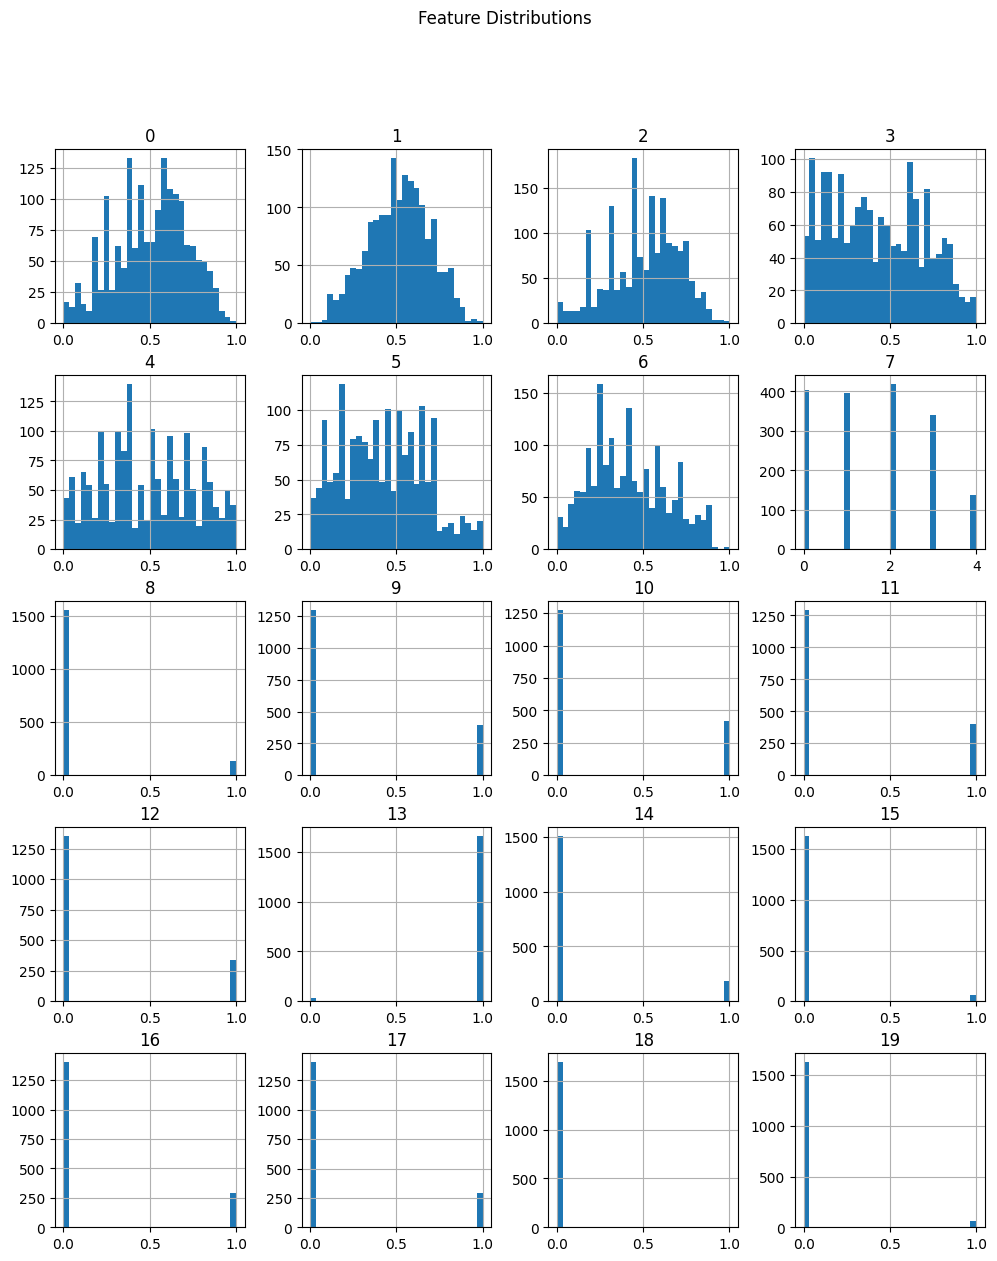

In [8]:
df_transformed.hist(figsize=(12, 14), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

In [9]:
print(df_transformed.describe())

                0            1            2            3            4   \
count  1698.000000  1698.000000  1698.000000  1698.000000  1698.000000   
mean      0.506249     0.514770     0.501230     0.425602     0.482603   
std       0.210577     0.177201     0.202863     0.260902     0.268419   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.367128     0.392103     0.346088     0.196721     0.265000   
50%       0.530927     0.522001     0.525618     0.393443     0.480000   
75%       0.662459     0.638348     0.658459     0.639344     0.700000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   \
count  1698.000000  1698.000000  1698.000000  1698.000000  1698.000000   
mean      0.423439     0.418940     1.655477     0.081272     0.233216   
std       0.238722     0.221132     1.261238     0.273333     0.423003   
min       0.000000     0.000000     0

The distribution analysis indicates that features 0 to 6 are numerical and appear to follow a normal distribution. Based on their statistical summary, there is no significant presence of extreme outliers that would require removal

In [10]:
pca = PCA(n_components=5)
pca.fit(df_transformed)

print("Explained Variance Ratio:", pca.explained_variance_ratio_.cumsum())

Explained Variance Ratio: [0.57490187 0.67571508 0.74996365 0.82039784 0.86182032]


PCA shows that 86% of the variance is captured by the first five components, improving clustering efficiency and reducing computation

**Clustering**

To determine the optimal number of clusters (K), we will evaluate three different clustering validation metrics:


1.   Elbow Method
2.   Silhouette Score
3.   Davies-Bouldin Index



Elbow Method

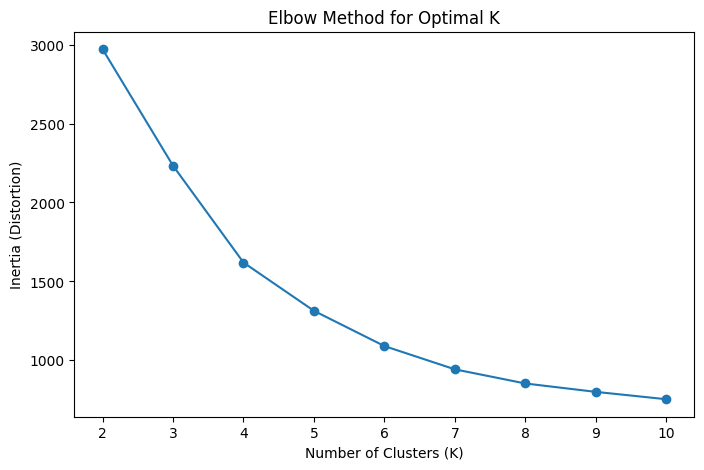

In [11]:
k_range = range(2, 11)
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_transformed)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Distortion)")
plt.title("Elbow Method for Optimal K")
plt.show()

Silhouette Score

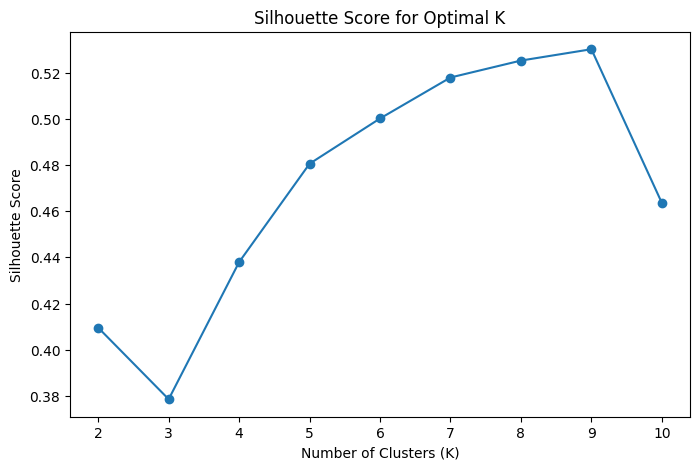

In [12]:
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_transformed)
    score = silhouette_score(df_transformed, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()

Davies-Bouldin Index

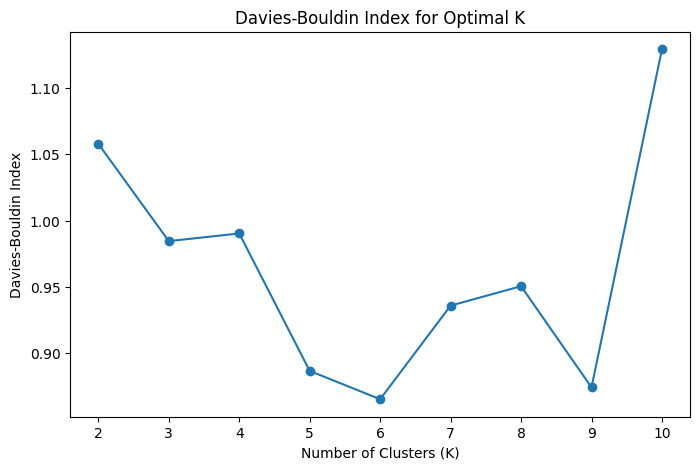

In [13]:
dbi_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_transformed)
    score = davies_bouldin_score(df_transformed, labels)
    dbi_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, dbi_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index for Optimal K")
plt.show()

Since each method suggested a different optimal K, we will analyze the metric scores to determine the best balance between cluster separation, compactness, and structure

    K  Silhouette Score  Davies-Bouldin Index      Inertia
0   2          0.409521              1.057937  2970.395545
1   3          0.378520              0.984559  2232.586146
2   4          0.437950              0.990358  1619.499778
3   5          0.480579              0.886725  1313.778535
4   6          0.500190              0.865396  1090.623590
5   7          0.517952              0.935948   943.240325
6   8          0.525291              0.950586   853.695486
7   9          0.530209              0.874321   800.544074
8  10          0.463606              1.129225   753.965679


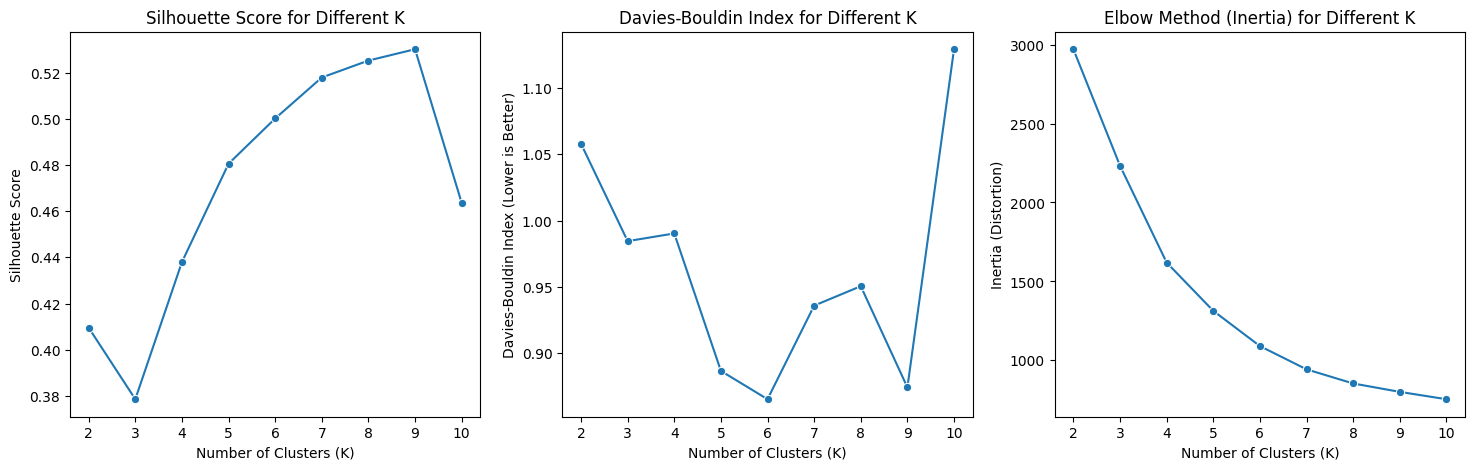

In [14]:
k_range = range(2, 11)
silhouette_scores = []
dbi_scores = []
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_transformed)

    silhouette_scores.append(silhouette_score(df_transformed, labels))
    dbi_scores.append(davies_bouldin_score(df_transformed, labels))
    inertia_values.append(kmeans.inertia_)

metrics_df = pd.DataFrame({
    "K": list(k_range),
    "Silhouette Score": silhouette_scores,
    "Davies-Bouldin Index": dbi_scores,
    "Inertia": inertia_values})

print(metrics_df)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

#Silhouette Score
sns.lineplot(x=k_range, y=silhouette_scores, marker="o", ax=ax[0])
ax[0].set_title("Silhouette Score for Different K")
ax[0].set_xlabel("Number of Clusters (K)")
ax[0].set_ylabel("Silhouette Score")

#Davies-Bouldin Index
sns.lineplot(x=k_range, y=dbi_scores, marker="o", ax=ax[1])
ax[1].set_title("Davies-Bouldin Index for Different K")
ax[1].set_xlabel("Number of Clusters (K)")
ax[1].set_ylabel("Davies-Bouldin Index (Lower is Better)")

#Inertia (Elbow Method)
sns.lineplot(x=k_range, y=inertia_values, marker="o", ax=ax[2])
ax[2].set_title("Elbow Method (Inertia) for Different K")
ax[2].set_xlabel("Number of Clusters (K)")
ax[2].set_ylabel("Inertia (Distortion)")

plt.show()

We selected K=6 as it provides the best balance between cluster separation (Silhouette Score) and compactness (lowest Davies-Bouldin Index), ensuring well-defined and distinct clusters

In [15]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df_transformed["Cluster"] = kmeans.fit_predict(df_transformed)

cluster_counts = df_transformed["Cluster"].value_counts()

print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
Cluster
2    420
3    396
1    341
0    270
4    138
5    133
Name: count, dtype: int64


In [16]:
cluster_summary = df_transformed.groupby("Cluster").mean()

print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
                0         1         2         3         4         5         6  \
Cluster                                                                         
0        0.461187  0.468132  0.489880  0.502064  0.480000  0.443036  0.343390   
1        0.574617  0.605913  0.577603  0.378155  0.495601  0.459130  0.533715   
2        0.508576  0.535879  0.518126  0.387666  0.526381  0.453856  0.448877   
3        0.451359  0.459330  0.453201  0.420227  0.462828  0.399381  0.359081   
4        0.773504  0.714293  0.728788  0.410311  0.496957  0.380078  0.542538   
5        0.301215  0.267158  0.181999  0.543695  0.360301  0.312718  0.233487   

           7    8    9   10   11   12        13        14        15        16  \
Cluster                                                                         
0        0.0  0.0  0.0  0.0  1.0  0.0  1.000000  0.077778  0.000000  0.000000   
1        3.0  0.0  0.0  0.0  0.0  1.0  0.994135  0.082111  0.005865  0.108504   
2        2